<a href="https://colab.research.google.com/github/MainakRepositor/The-Sparks-Foundation-Task/blob/master/TSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://ci6.googleusercontent.com/proxy/KQIKb57j6tZR4Tue4PXptzlg9B2VvTX6wWp7qQbVV628h0yboRXLQYm0WrPNNUORJQxfa60FuCm6bbZB4q8cQkgW=s0-d-e1-ft#https://links.aine.ai/assets/TSF_logo_small.png "></center>

<center>

# ***GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP)***
### **ORGANIZER** : The Sparks Foundation
### **DOMAIN**    : Data Science and Business Analytics 

<hr>

PROJECT DETAILS : ***TASK 1***
<hr>


**AUTHOR** : MAINAK CHAUDHURI

**OBJECTIVE** : To predict the exam scores of a student who  studied for a given number of hours.

**METHOD USED** : Supervised Machine Learning (Linear Regression)
</center>
<hr>


### 1. Importing necessary libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("All necessary packages have been included successfully!")

All necessary packages have been included successfully!


### 2. Importing the dataset

In [94]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url,error_bad_lines=False)

print("Displaying the top 5 rows of the dataset :\n")
df.head()

Displaying the top 5 rows of the dataset :



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 3. Finding data insights

In [133]:
## Shuffling data and generate random sample of 10 values (to remove bias)

df.sample(10)

,Hours,Scores
16,2.5,30
13,3.3,42
14,1.1,17
22,3.8,35
0,2.5,21
4,3.5,30
7,5.5,60
6,9.2,88
24,7.8,86
20,2.7,30


In [96]:
## Finding the dimensions of the dataset
r,c = df.shape
print("Number of parameters in the data set   : ",c)
print("Number of data entries in the data set : ",r)

Number of parameters in the data set   :  2
Number of data entries in the data set :  25


In [97]:
## Finding the type of data each column contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4. Checking and removal of missing data items

In [98]:
print("Are there any missing values in the dataset ?",df.isnull().values.any())

Are there any missing values in the dataset ? False


### 5. Statistical Treatment of Data

In [99]:
## Dataset summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [100]:
## Spearman's Correlation table
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### 6. Visual inference from data

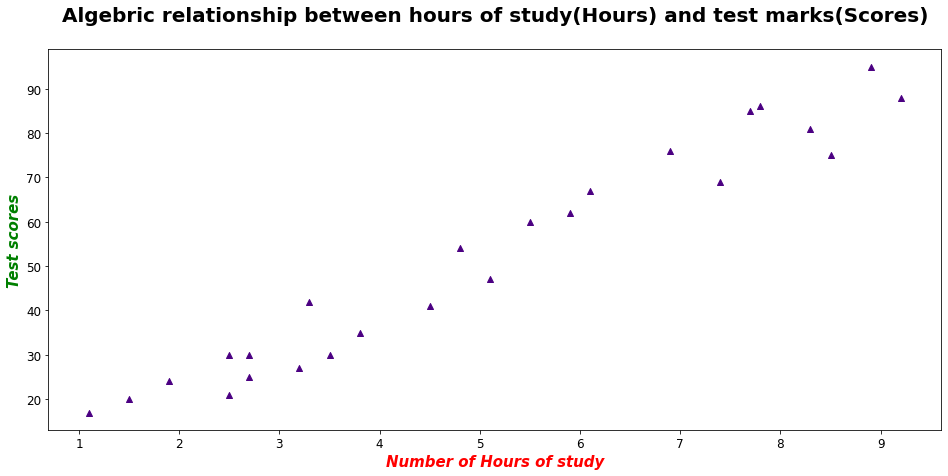

In [101]:
## check of linearity in data
plt.figure(figsize=(16,7))
plt.title("Algebric relationship between hours of study(Hours) and test marks(Scores)\n",fontsize=20,fontweight='bold')
plt.scatter(df['Hours'],df['Scores'],color='indigo',marker='^')
plt.xlabel('Number of Hours of study',fontsize=15,fontstyle='italic',fontweight='bold',color='red')
plt.xticks(fontsize=12)
plt.ylabel('Test scores',fontsize=15,fontstyle='italic',fontweight='bold',color='green')
plt.yticks(fontsize=12)
plt.show()

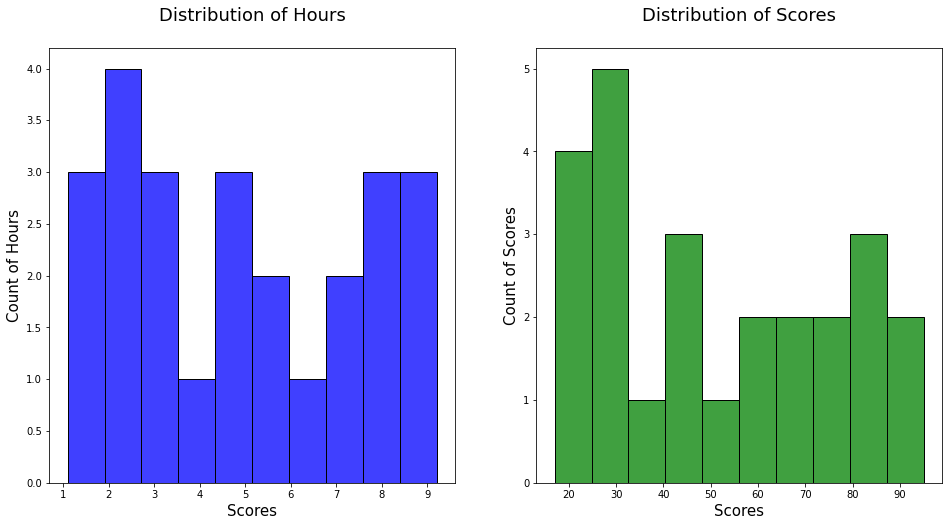

In [102]:
## check of distribution in data
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
ax = sns.histplot(df['Hours'],bins=10,color='b')
ax.set_title('Distribution of Hours\n',fontsize=18)
ax.set_xlabel('Scores',fontsize=15)
ax.set_ylabel('Count of Hours',fontsize=15)

plt.subplot(1,2,2)
bx = sns.histplot(df['Scores'],bins=10,color='g')
bx.set_title('Distribution of Scores\n',fontsize=18)
bx.set_xlabel('Scores',fontsize=15)
bx.set_ylabel('Count of Scores',fontsize=15)
plt.show()

<center> 

## **Modelling and Application** </center>
<hr>


### 7. Preparing dataset for modelling

In [103]:
x = df[['Hours']]
y = df[['Scores']]
print('Variables are assigned')

Variables are assigned


In [104]:
## splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)
print('Data is split in the set ratio')

Data is split in the set ratio


### 8. Building the linear regression model

In [105]:
## training the model on values
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Model has been trained successfully!')

Model has been trained successfully!


In [116]:
## prediction results
actual_scores = y_test
predict_scores = lr.predict(x_test)
predict_scores

array([[ 9.93952968],
       [32.84320126],
       [18.26813752],
       [86.97915227],
       [48.45934097],
       [78.65054442],
       [61.99332873],
       [75.52731648]])

### 9. Model Evaluation

In [107]:
## Mathematical verification :

print("coefficient = ",lr.coef_)
print("intercept   = ",lr.intercept_)
print("value of x  = ",8.5)
print("Result (y)  = ",(lr.coef_*8.5 + lr.intercept_))

coefficient =  [[10.41075981]]
intercept   =  [-1.51230612]
value of x  =  8.5
Result (y)  =  [[86.97915227]]


In [108]:
## Model prediction result :
lr.predict([[8.5]])

array([[86.97915227]])

In [109]:
## Manual check of accuracy
''' To check the accuracy, we will substract predicted value from mathematically verified value and find the result in %'''
y = lr.coef_*8 + lr.intercept_
yp = lr.predict([[8]])
r = int(100.00 - (y - yp))
print("Predicted result accuracy percentage : ",r,"%")

Predicted result accuracy percentage :  100 %


### 10. Model result visualization

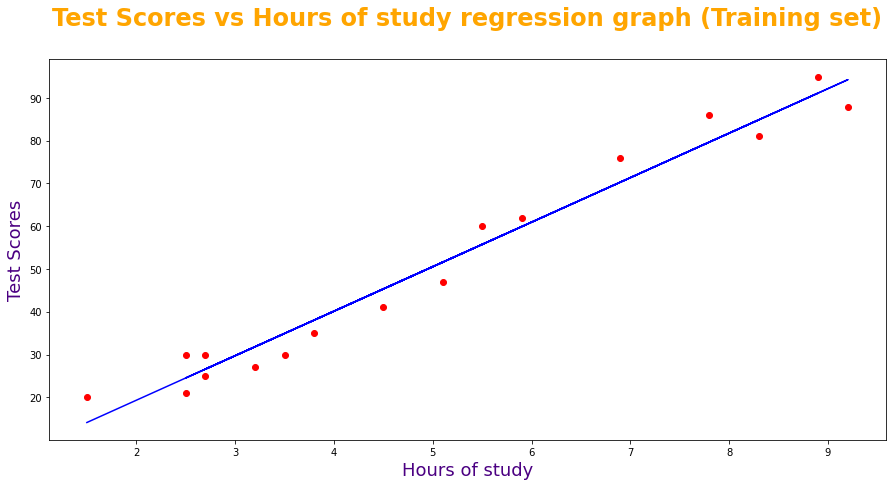

In [110]:
plt.figure(figsize=(15,7))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.xlabel('Hours of study',size=18,color='indigo')
plt.ylabel('Test Scores',size=18,color='indigo')
plt.title('Test Scores vs Hours of study regression graph (Training set)\n',size=24,color='orange',fontweight='bold')
plt.show()

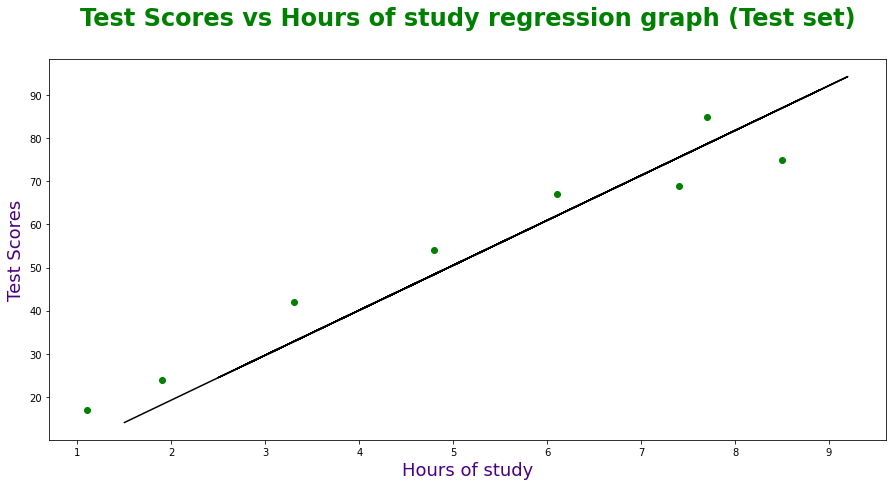

In [111]:
plt.figure(figsize=(15,7))
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,lr.predict(x_train),color='black')
plt.xlabel('Hours of study',size=18,color='indigo')
plt.ylabel('Test Scores',size=18,color='indigo')
plt.title('Test Scores vs Hours of study regression graph (Test set)\n',size=24,color='green',fontweight='bold')
plt.show()

### 11. Model Performance
checking performance for values that are not in the dataset

In [132]:
## random hours for testing model performance
x = [9.5,7.8,3.6,8.9,7.0]

for i in range(len(x)):
  pred = lr.predict([[x[i]]])
  print('Predicted Test Score on',x[i],'hours of study = ',str(pred)[2:-8],'%')

Predicted Test Score on 9.5 hours of study =  97.38 %
Predicted Test Score on 7.8 hours of study =  79.6 %
Predicted Test Score on 3.6 hours of study =  35.9 %
Predicted Test Score on 8.9 hours of study =  91.1 %
Predicted Test Score on 7.0 hours of study =  71.36 %


## Some useful insight discovered during working with linear regression:

<hr>

Advantages :

i.Automatically chooses the best fit graph for any dataset with a single x and y.

ii.Works very fast, compared to other regression models, due to its simplicity.

iii.useful for 2 variable datasets (x and y only) of any size

<hr>

Disadvantages :

i.Not good for multivariate datasets and large (datasets with more than 1 independent parameters) or more than 1 million data elements.

ii.Cannot recognize mathemetical patterns like a sine series or quadratic trends

iii.Could not produce a good result if the data is largely scattered.

<hr>

<center>

# **THANK YOU!** 😊

</center>